<h1><center>Data Analysis for Business Project</center></h1>
<h2><center>Predict the House Price</center></h2>
<h4><center>Fabrizio Rocco and Diego Croci</center></h4>

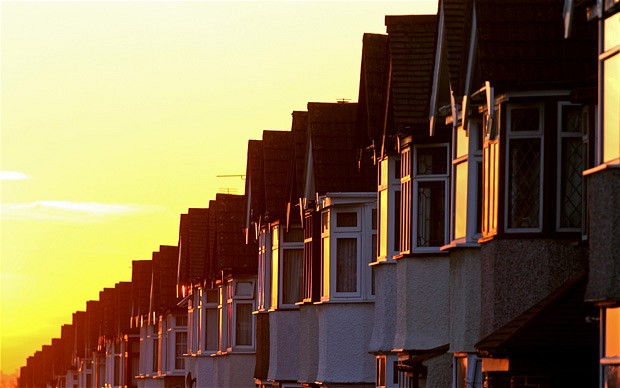

The aim of this project is to build a Machine Learning model in order to predict the appropriate price of a house given a set of features.
We decided to divide our analysis into 5 parts:
 - First look at the problem and general understanding of the variables;
 - Study the main variable ("SalePrice"); 
 - Study how the main variable is related to the other feature;
 - Data Preprocessing: make some cleaning on our training data set in order to better visualize and estimate;
 - Build a model in order to predict SalePrice 
 
***

#### Importing Libraries and play a bit with our dataset  

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import math

In [116]:
data_train = pd.read_csv("train.csv")
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,78.0,7800,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,2Story,5,8,1948,2002,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,Gd,No,GLQ,603,Unf,...,2008,1,0,3,0,3,1,Ex,8,Typ,0,NaN,Attchd,1948.0,Unf,1,230,TA,TA,Y,103,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,225000
1,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1960,1960,Gable,CompShg,MetalSd,HdBoard,BrkFace,324.0,TA,TA,CBlock,TA,TA,No,Rec,697,Unf,...,1264,1,0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1960.0,Unf,2,461,TA,TA,Y,0,0,0,0,143,0,NaN,NaN,NaN,0,4,2010,WD,Normal,167500
2,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,...,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
3,30,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1921,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,616,Unf,...,616,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1921.0,Unf,1,205,TA,TA,Y,0,0,129,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,89000
4,20,RL,87.0,11146,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,250.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,...,1717,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,908,TA,TA,Y,169,39,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,255500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,60,RL,NaN,10900,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,7,1977,1977,Gable,CompShg,HdBoard,HdBoard,BrkFace,153.0,TA,TA,CBlock,Gd,TA,No,GLQ,378,Unf,...,1392,0,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1977.0,Fin,1,299,TA,TA,Y,0,36,0,0,0,0,NaN,MnPrv,Shed,450,3,2010,WD,Normal,161750
1096,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,5,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,142.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,...,1302,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1991.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,COD,Abnorml,112000
1097,20,RL,93.0,9382,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,...,1479,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2,577,TA,TA,Y,120,25,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,191000
1098,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,...,1375,0,0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1979.0,Unf,1,544,TA,TA,P,0,162,0,0,126,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000


In [71]:
data_test = pd.read_csv("test.csv")
data_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,NaN,12394,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,10,2007,WD,Family
1,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2008,New,Partial
2,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
3,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
4,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
356,160,RL,36.0,2268,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
357,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,New,Partial
358,20,RL,91.0,14303,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal


In [72]:
y = data_train.SalePrice
train_without_response = data_train[data_train.columns.difference(['SalePrice'])]
result = pd.concat([train_without_response,data_test], ignore_index=True)
result

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,X1stFlrSF,X2ndFlrSF,X3SsnPorch,YearBuilt,YearRemodAdd,YrSold
0,NaN,3,1Fam,Gd,No,603,0,GLQ,Unf,1,...,8,896,AllPub,103,1112,896,0,1948,2002,2006
1,NaN,3,1Fam,TA,No,697,0,Rec,Unf,1,...,6,1268,AllPub,0,1264,0,0,1960,1960,2010
2,NaN,3,1Fam,TA,No,1124,479,GLQ,NaN,1,...,7,3206,AllPub,0,1629,0,0,2003,2004,2009
3,NaN,2,1Fam,TA,No,616,0,LwQ,Unf,0,...,4,616,AllPub,0,616,0,0,1921,1950,2006
4,NaN,3,1Fam,TA,Av,0,0,Unf,Unf,0,...,7,1709,AllPub,169,1717,0,0,2006,2006,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,2,Duplex,NaN,NaN,0,0,NaN,NaN,0,...,6,0,AllPub,0,1040,0,0,1950,1950,2006
1456,NaN,2,Twnhs,TA,No,567,0,GLQ,Unf,0,...,6,764,AllPub,0,764,862,0,2003,2004,2009
1457,NaN,2,TwnhsE,TA,Gd,547,0,GLQ,Unf,1,...,5,547,AllPub,0,1072,0,0,2005,2006,2006
1458,NaN,2,1Fam,TA,Gd,1314,0,GLQ,Unf,1,...,7,1986,AllPub,262,1987,0,0,1994,1994,2008


In [15]:
result.head()

,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,X1stFlrSF,X2ndFlrSF,X3SsnPorch,YearBuilt,YearRemodAdd,YrSold
0,NaN,3,1Fam,Gd,No,603,0,GLQ,Unf,1,...,8,896,AllPub,103,1112,896,0,1948,2002,2006
1,NaN,3,1Fam,TA,No,697,0,Rec,Unf,1,...,6,1268,AllPub,0,1264,0,0,1960,1960,2010
2,NaN,3,1Fam,TA,No,1124,479,GLQ,NaN,1,...,7,3206,AllPub,0,1629,0,0,2003,2004,2009
3,NaN,2,1Fam,TA,No,616,0,LwQ,Unf,0,...,4,616,AllPub,0,616,0,0,1921,1950,2006
4,NaN,3,1Fam,TA,Av,0,0,Unf,Unf,0,...,7,1709,AllPub,169,1717,0,0,2006,2006,2009


In [16]:
result.tail()

,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,X1stFlrSF,X2ndFlrSF,X3SsnPorch,YearBuilt,YearRemodAdd,YrSold
355,NaN,2,Duplex,NaN,NaN,0,0,NaN,NaN,0,...,6,0,AllPub,0,1040,0,0,1950,1950,2006
356,NaN,2,Twnhs,TA,No,567,0,GLQ,Unf,0,...,6,764,AllPub,0,764,862,0,2003,2004,2009
357,NaN,2,TwnhsE,TA,Gd,547,0,GLQ,Unf,1,...,5,547,AllPub,0,1072,0,0,2005,2006,2006
358,NaN,2,1Fam,TA,Gd,1314,0,GLQ,Unf,1,...,7,1986,AllPub,262,1987,0,0,1994,1994,2008
359,NaN,3,1Fam,TA,No,0,0,Unf,Unf,0,...,7,793,AllPub,0,1142,793,0,1976,1976,2007


In [6]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 80 columns):
MSSubClass       1100 non-null int64
MSZoning         1100 non-null object
LotFrontage      914 non-null float64
LotArea          1100 non-null int64
Street           1100 non-null object
Alley            69 non-null object
LotShape         1100 non-null object
LandContour      1100 non-null object
Utilities        1100 non-null object
LotConfig        1100 non-null object
LandSlope        1100 non-null object
Neighborhood     1100 non-null object
Condition1       1100 non-null object
Condition2       1100 non-null object
BldgType         1100 non-null object
HouseStyle       1100 non-null object
OverallQual      1100 non-null int64
OverallCond      1100 non-null int64
YearBuilt        1100 non-null int64
YearRemodAdd     1100 non-null int64
RoofStyle        1100 non-null object
RoofMatl         1100 non-null object
Exterior1st      1100 non-null object
Exterior2nd      1100 non-n

In [73]:
result.shape #Numero di colonne e righe 

(1100, 80)

In [7]:
result.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [74]:
result.describe()

,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,...,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,X1stFlrSF,X2ndFlrSF,X3SsnPorch,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,0.613014,1.565068,472.980137,...,15.060959,6.517808,1057.429452,94.244521,1162.626712,346.992466,3.409589,1971.267808,1984.865753,2007.815753
std,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,0.644666,0.550916,213.804841,...,55.757415,1.625393,438.705324,125.338794,386.587738,436.528436,29.317331,30.202904,20.645407,1.328095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,0.000000,1.000000,334.500000,...,0.000000,5.000000,795.750000,0.000000,882.000000,0.000000,0.000000,1954.000000,1967.000000,2007.000000
50%,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,1.000000,2.000000,480.000000,...,0.000000,6.000000,991.500000,0.000000,1087.000000,0.000000,0.000000,1973.000000,1994.000000,2008.000000
75%,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,1.000000,2.000000,576.000000,...,0.000000,7.000000,1298.250000,168.000000,1391.250000,728.000000,0.000000,2000.000000,2004.000000,2009.000000
max,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,3.000000,3.000000,1418.000000,...,480.000000,14.000000,6110.000000,857.000000,4692.000000,2065.000000,508.000000,2010.000000,2010.000000,2010.000000


# Our initial considerations 
Looking forward to our columns, we found some variables which can have an high correlation with our main variable SalePrice:
- __Year Built__
- __TotalBsmtSF__
- __GrLivArea__
- __PoolArea__

These are variables related to the conditions of the building, its age and some "extra luxury" features such as __PoolArea__. 
In principle they are all characteristics which can rise the price of an abitation. 
Another theory we suggested was to consider mainly the "inner" part of the house, such as __KitchenQual__ or __CentralAir__, but these could be too general features which mainly all the houses can have.

Now, with these prior hypotesis, let's dive into the "__SalePrice__" analysis.

# SalePrice Analysis

In [5]:
y.describe()

count      1100.000000
mean     179504.071818
std       79089.643205
min       34900.000000
25%      129000.000000
50%      162000.000000
75%      212000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness coeff. is: 1.996298
Kurtosis coeff. is: 7.549643


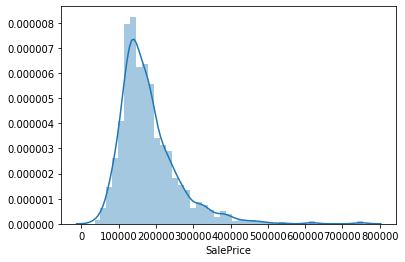

In [7]:
sns.distplot(data_train['SalePrice']);
print("Skewness coeff. is: %f" % data_train['SalePrice'].skew())
print("Kurtosis coeff. is: %f" % data_train['SalePrice'].kurt())

These measures of symmetry are useful in order to understand the symmetry of the distribution of our main variable.
Our distribution is highly skewed and present a longer tail on the right. 
The high value of kurtosis can determine an higher probability of outliers values.

# The other variables

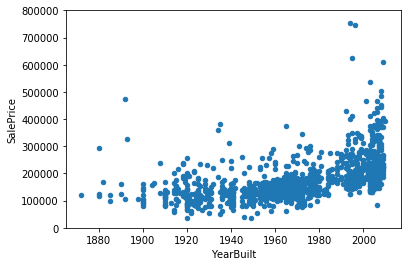

In [75]:
data_year_trend = pd.concat([data_train['SalePrice'], data_train['YearBuilt']], axis=1)
data_year_trend.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000));

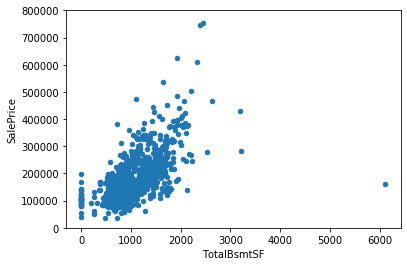

In [12]:
data_bsmt_trend = pd.concat([data_train['SalePrice'], data_train['TotalBsmtSF']], axis=1)
data_bsmt_trend.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

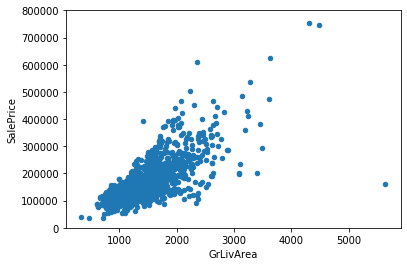

In [13]:
data_GrLivArea_trend = pd.concat([data_train['SalePrice'], data_train['GrLivArea']], axis=1)
data_GrLivArea_trend.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

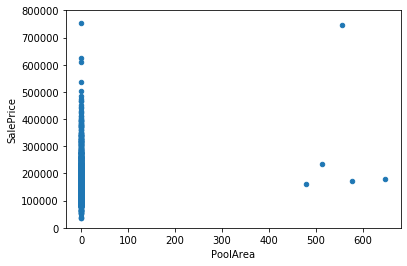

In [14]:
data_PoolArea_trend = pd.concat([data_train['SalePrice'], data_train['PoolArea']], axis=1)
data_PoolArea_trend.plot.scatter(x='PoolArea', y='SalePrice', ylim=(0,800000));

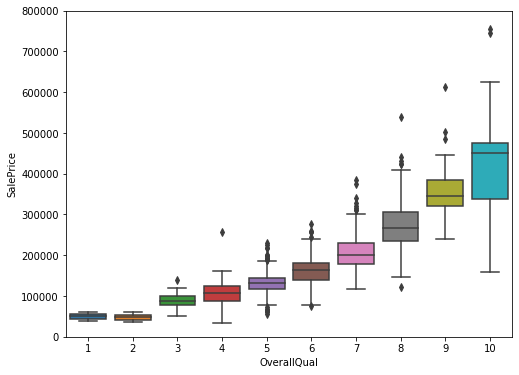

In [11]:
data = pd.concat([data_train['SalePrice'], data_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

By these analysis we discovered that our previsions were quite correct.

__Year Built__ seems to have a slight relation with our main variable, and people, as we thought, tend to buy newer houses. 

Instead, for __TotalBsmtSF__ and __GrLivArea__ there seems be a stronger relation with __SalePrice__. 

# Heatmap Correlation Matrix

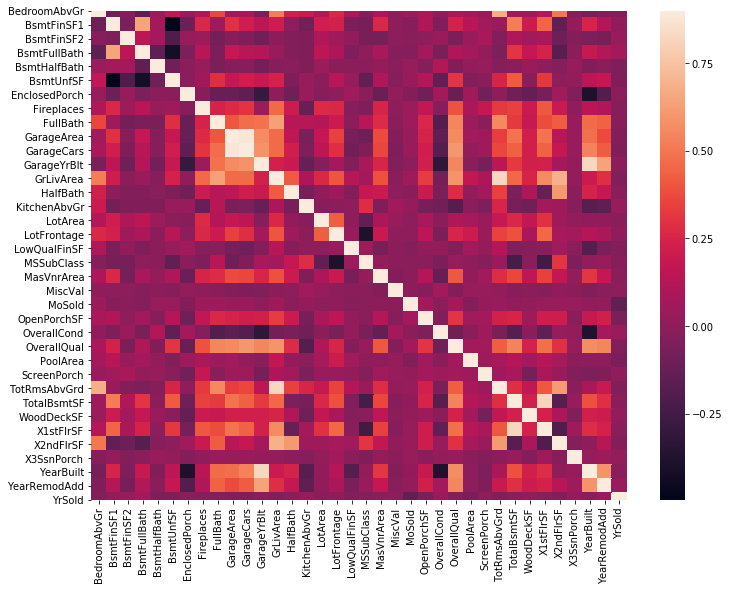

In [76]:
corr_matrix = result.corr()
f, ax1 = plt.subplots(figsize=(12,9)) 
ax1=sns.heatmap(corr_matrix,vmax = 0.9); 

Using this kind of plot we can deduce if there's some collinearity between 2 or more variables.
In particoular, there are some white blocks which have to be analyzed:
1. __GarageYrBlt__ and __YearBuilt__
2. __TotRmsAbvGrd__ and __GrLivArea__
3. __TotalBsmtSF__ and __X1stFlrSF__
4. __GarageArea__ and __GarageCars__
 
Knowing the meaning of these pairs of variables seems trivial to notice a collinearity between pairs "1", "3" and "4".
For the "2" pair the difference is slightly more subtle because the house area and the total number of rooms, not always are related. 
For example two houses with the same living area can be inhabited by different number of peoples and so the actual disposition/number of the rooms can be different.

Let's restrict our matrix a bit more.

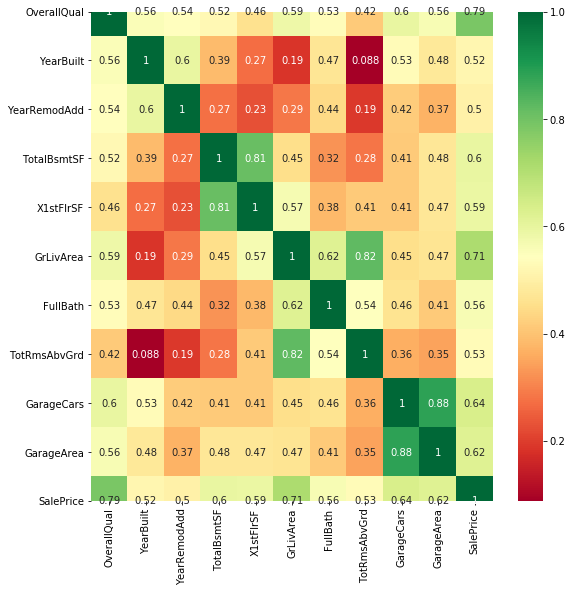

In [77]:
corrmat = data_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(9,9))
g = sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [78]:
var = data_train[data_train.columns[1:]].corr()['SalePrice'][:]
var

LotFrontage      0.346862
LotArea          0.257270
OverallQual      0.787343
OverallCond     -0.047831
YearBuilt        0.518589
YearRemodAdd     0.502826
MasVnrArea       0.479240
BsmtFinSF1       0.402158
BsmtFinSF2      -0.013269
BsmtUnfSF        0.189616
TotalBsmtSF      0.596295
X1stFlrSF        0.592968
X2ndFlrSF        0.320073
LowQualFinSF    -0.005878
GrLivArea        0.713628
BsmtFullBath     0.243368
BsmtHalfBath    -0.014039
FullBath         0.563405
HalfBath         0.294575
BedroomAbvGr     0.164832
KitchenAbvGr    -0.136364
TotRmsAbvGrd     0.532321
Fireplaces       0.468865
GarageYrBlt      0.491578
GarageCars       0.636399
GarageArea       0.622342
WoodDeckSF       0.323612
OpenPorchSF      0.318482
EnclosedPorch   -0.135636
X3SsnPorch       0.040534
ScreenPorch      0.091996
PoolArea         0.100935
MiscVal         -0.027705
MoSold           0.016663
YrSold          -0.020189
SalePrice        1.000000
Name: SalePrice, dtype: float64

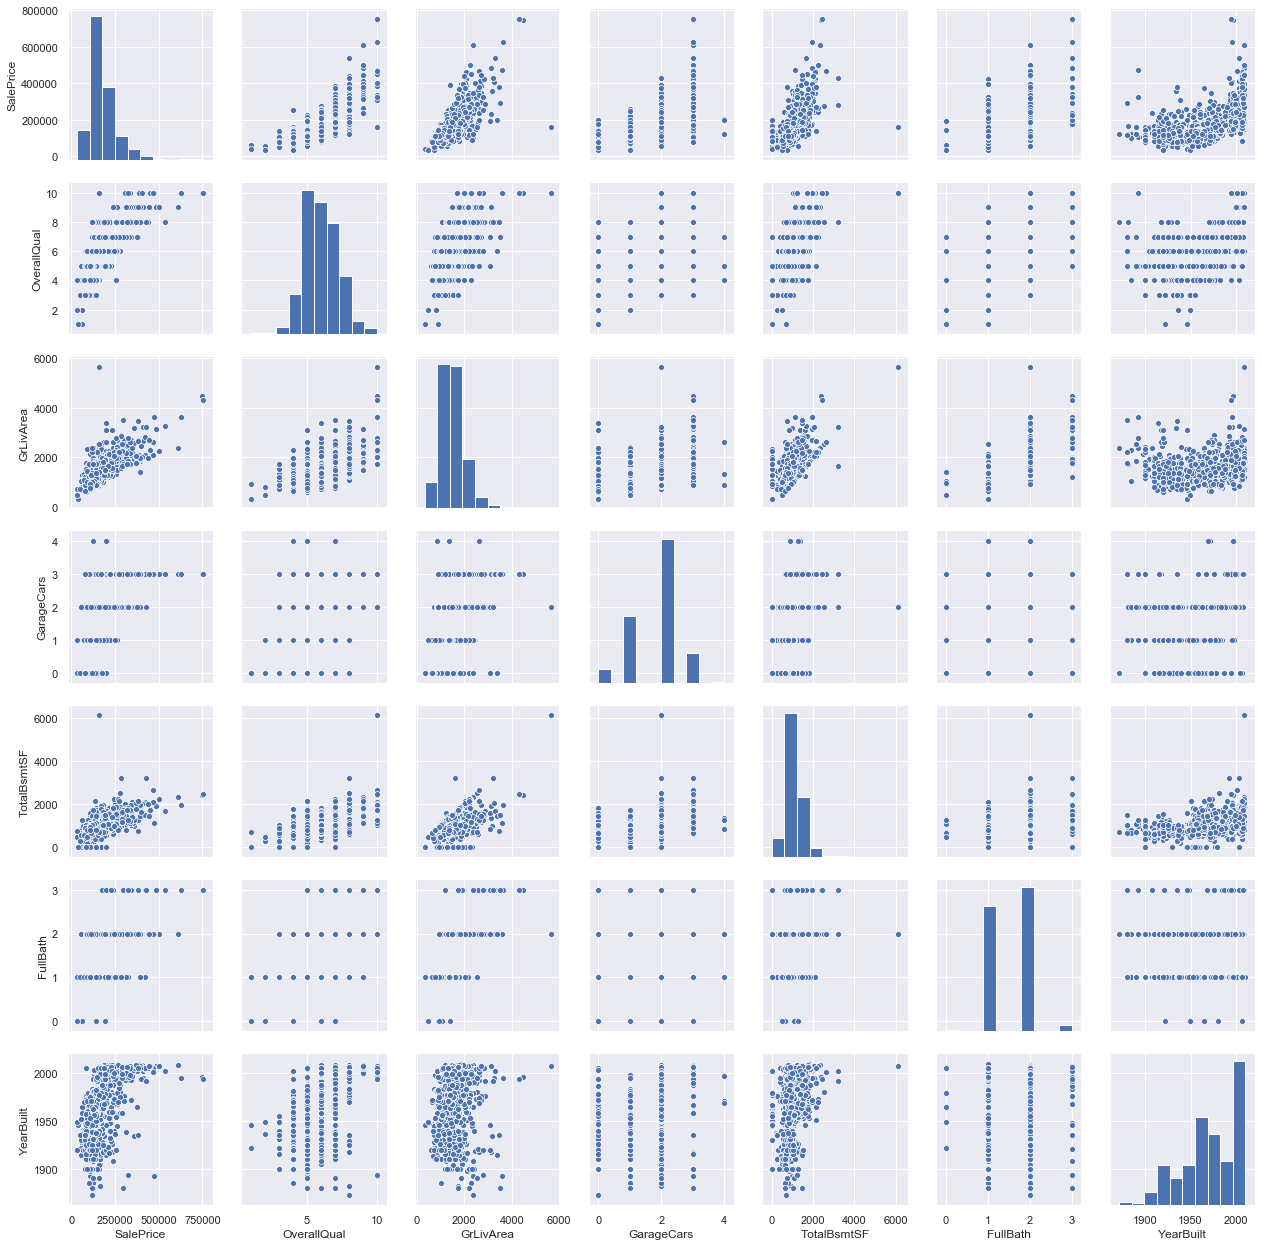

In [6]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], height = 2.5)
plt.show();

# Number of null vallues 

Now our goal is to deal with null values and try to understand for each one what can we do: maybe we can replace them or maybe we can just skip them. 

In [79]:
total_null = result.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (result.isnull().sum()/result.isnull().count()).sort_values(ascending=False) #Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479


We have to do some considerations. 
Let's divide our null values into 2 groups:
 - __PoolQC__, __MiscFeature__, __Alley__, __Fence__, __FireplaceQu__ and __LotFrontage__.
These are all variables which presents many null values. In general, by common opinion, we can discourage variables which have more than 15% of missing values. 
These are not vital information for someone who wants to buy an house, such as __FireplaceQu__ or, for example, many houses doesn't have an __Alley__ access. We can drop them.

The second group:
 - __GarageX__ properties
If we look carefully, all of these variables have the same number of null values! Maybe this can be a strange coincidence, or just that they all refer to the same variable Garage, in which "Na" means "There is no Garage". The same occurs for __BsmtX__ and MasVnr__, which means that we will have to deal with them afterwards.

In [80]:
result = result.drop((missing_data[missing_data["Percentage"] > 0.15]).index,1) #Drop All Var. with null values > 1
#data_train = data_train.drop(data_train.loc[data_train['Electrical'].isnull()].index) #Delete the single null value in Electrical
result.isnull().sum()

BedroomAbvGr     0
BldgType         0
BsmtCond        37
BsmtExposure    38
BsmtFinSF1       0
                ..
X2ndFlrSF        0
X3SsnPorch       0
YearBuilt        0
YearRemodAdd     0
YrSold           0
Length: 73, dtype: int64

# Split categorical and numerical variables

In [81]:
del result["KitchenAbvGr"]
del result["YrSold"]
del result["MoSold"]
del result["MiscVal"]
del result["ScreenPorch"]
del result["X3SsnPorch"]
del result["BsmtHalfBath"]
del result["LowQualFinSF"]
del result["OverallCond"]
del result["EnclosedPorch"]
del result["MSSubClass"]
del result["X1stFlrSF"]
del result["YearBuilt"]
del result["YearRemodAdd"] 
del result["BsmtFinSF2"] #0 variance
del result["BsmtFinSF1"] #Because BsmtFinSF1 + BsmtUnfSF + BsmtFinSF2 = TotalBsmtSF
del result["BsmtUnfSF"] #Because BsmtFinSF1 + BsmtUnfSF + BsmtFinSF2 = TotalBsmtSF
del result["PoolArea"] #0 variance
del result["GarageYrBlt"] #Dropped for the same reason of YearBuilt, it might mislead our predictions
del result["GarageCond"] #0 Variance
del result["GarageArea"] #High Correlation
del result["TotRmsAbvGrd"] #High Correlation
result

,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtQual,CentralAir,Condition1,...,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,TotalBsmtSF,Utilities,WoodDeckSF,X2ndFlrSF
0,3,1Fam,Gd,No,GLQ,Unf,1,TA,Y,Norm,...,Y,CompShg,Gable,Normal,WD,Pave,896,AllPub,103,896
1,3,1Fam,TA,No,Rec,Unf,1,TA,Y,Feedr,...,Y,CompShg,Gable,Normal,WD,Pave,1268,AllPub,0,0
2,3,1Fam,TA,No,GLQ,NaN,1,Gd,Y,Norm,...,Y,CompShg,Gable,Normal,WD,Pave,3206,AllPub,0,0
3,2,1Fam,TA,No,LwQ,Unf,0,TA,Y,Norm,...,Y,CompShg,Gable,Normal,WD,Pave,616,AllPub,0,0
4,3,1Fam,TA,Av,Unf,Unf,0,Ex,Y,Norm,...,Y,CompShg,Gable,Normal,WD,Pave,1709,AllPub,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,Duplex,NaN,NaN,NaN,NaN,0,NaN,N,Norm,...,Y,CompShg,Gable,Normal,WD,Pave,0,AllPub,0,0
1456,2,Twnhs,TA,No,GLQ,Unf,0,Gd,Y,Norm,...,Y,CompShg,Gable,Normal,WD,Pave,764,AllPub,0,862
1457,2,TwnhsE,TA,Gd,GLQ,Unf,1,Gd,Y,Norm,...,Y,CompShg,Gable,Partial,New,Pave,547,AllPub,0,0
1458,2,1Fam,TA,Gd,GLQ,Unf,1,Gd,Y,Norm,...,Y,CompShg,Hip,Normal,WD,Pave,1986,AllPub,262,0


In [33]:
result['ExterCond'].value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

In [82]:
del result["Street"]
del result["LandContour"]
del result["Utilities"]
del result["LandSlope"]
del result["Condition2"]
del result["RoofMatl"]
del result["BsmtFinType2"] #0 variance
del result["Electrical"] #0 Variance
del result["Condition1"]#Too many levels versione 2
del result["BldgType"]#versione 2
del result["HouseStyle"]#versione 2
del result["Exterior1st"]#versione 2
del result["Exterior2nd"]#versione 2
del result["Foundation"]#versione 2
del result["CentralAir"]#0 variance
del result["Functional"]#0 variance
del result["SaleType"]#0 variance
del result["SaleCondition"]#0 variance
del result["RoofStyle"]#0 variance
result

,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtQual,ExterCond,ExterQual,Fireplaces,FullBath,...,MSZoning,MasVnrArea,MasVnrType,Neighborhood,OpenPorchSF,OverallQual,PavedDrive,TotalBsmtSF,WoodDeckSF,X2ndFlrSF
0,3,Gd,No,GLQ,1,TA,Gd,TA,0,3,...,RL,0.0,None,Edwards,0,5,Y,896,103,896
1,3,TA,No,Rec,1,TA,TA,TA,2,1,...,RL,324.0,BrkFace,NAmes,0,5,Y,1268,0,0
2,3,TA,No,GLQ,1,Gd,TA,Gd,1,2,...,RL,296.0,BrkFace,NridgHt,0,8,Y,3206,0,0
3,2,TA,No,LwQ,0,TA,TA,TA,0,1,...,RM,0.0,None,BrkSide,0,5,Y,616,0,0
4,3,TA,Av,Unf,0,Ex,TA,Gd,1,2,...,RL,250.0,Stone,NridgHt,39,8,Y,1709,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,NaN,NaN,NaN,0,NaN,TA,TA,0,2,...,RL,0.0,None,NAmes,0,3,Y,0,0,0
1456,2,TA,No,GLQ,0,Gd,TA,Gd,0,2,...,RL,106.0,Stone,NridgHt,27,7,Y,764,0,862
1457,2,TA,Gd,GLQ,1,Gd,TA,TA,0,2,...,RM,82.0,BrkFace,Edwards,44,6,Y,547,0,0
1458,2,TA,Gd,GLQ,1,Gd,TA,Gd,1,2,...,RL,554.0,BrkFace,NoRidge,36,8,Y,1986,262,0


In [83]:
result.shape

(1460, 32)

In [84]:
#Here we encode ExterQual in a rank
result.loc[result['ExterQual'] == "Ex", 'ExterQual'] = 5
result.loc[result['ExterQual'] == "Gd", 'ExterQual'] = 4
result.loc[result['ExterQual'] == "TA", 'ExterQual'] = 3
result.loc[result['ExterQual'] == "Fa", 'ExterQual'] = 2
result.loc[result['ExterQual'] == "Po", 'ExterQual'] = 1
result['ExterQual']

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0       3
1       3
2       4
3       3
4       4
       ..
1455    3
1456    4
1457    3
1458    4
1459    3
Name: ExterQual, Length: 1460, dtype: int64

In [85]:
#Here we encode ExterCond in Rank
result.loc[result['ExterCond'] == "Ex", 'ExterCond'] = 5
result.loc[result['ExterCond'] == "Gd", 'ExterCond'] = 4
result.loc[result['ExterCond'] == "TA", 'ExterCond'] = 3
result.loc[result['ExterCond'] == "Fa", 'ExterCond'] = 2
result.loc[result['ExterCond'] == "Po", 'ExterCond'] = 1
result['ExterCond']

0       4
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Name: ExterCond, Length: 1460, dtype: int64

In [86]:
#Here we encode HeatingQC in Rank
result.loc[result['HeatingQC'] == "Ex", 'HeatingQC'] = 5
result.loc[result['HeatingQC'] == "Gd", 'HeatingQC'] = 4
result.loc[result['HeatingQC'] == "TA", 'HeatingQC'] = 3
result.loc[result['HeatingQC'] == "Fa", 'HeatingQC'] = 2
result.loc[result['HeatingQC'] == "Po", 'HeatingQC'] = 1
result['HeatingQC']

0       5
1       3
2       5
3       4
4       5
       ..
1455    4
1456    5
1457    4
1458    5
1459    3
Name: HeatingQC, Length: 1460, dtype: int64

In [87]:
#Here we encode BsmtFinType1 in Rank
result.loc[result['BsmtFinType1'] == "GLQ", 'BsmtFinType1'] = 6
result.loc[result['BsmtFinType1'] == "ALQ", 'BsmtFinType1'] = 5
result.loc[result['BsmtFinType1'] == "BLQ", 'BsmtFinType1'] = 4
result.loc[result['BsmtFinType1'] == "Rec", 'BsmtFinType1'] = 3
result.loc[result['BsmtFinType1'] == "LwQ", 'BsmtFinType1'] = 2
result.loc[result['BsmtFinType1'] == "Unf", 'BsmtFinType1'] = 1
result['BsmtFinType1'].fillna(0, inplace= True)
result['BsmtFinType1']

0       6
1       3
2       6
3       2
4       1
       ..
1455    0
1456    6
1457    6
1458    6
1459    1
Name: BsmtFinType1, Length: 1460, dtype: int64

In [88]:
#Here we encode BsmtCond in Rank
result.loc[result['BsmtCond'] == "Ex", 'BsmtCond'] = 5
result.loc[result['BsmtCond'] == "Gd", 'BsmtCond'] = 4
result.loc[result['BsmtCond'] == "TA", 'BsmtCond'] = 3
result.loc[result['BsmtCond'] == "Fa", 'BsmtCond'] = 2
result.loc[result['BsmtCond'] == "Po", 'BsmtCond'] = 1
result['BsmtCond'].fillna(0, inplace= True)
result['BsmtCond']

0       4
1       3
2       3
3       3
4       3
       ..
1455    0
1456    3
1457    3
1458    3
1459    3
Name: BsmtCond, Length: 1460, dtype: int64

In [89]:
#Here we encode BsmtQual in Rank
result.loc[result['BsmtQual'] == "Ex", 'BsmtQual'] = 5
result.loc[result['BsmtQual'] == "Gd", 'BsmtQual'] = 4
result.loc[result['BsmtQual'] == "TA", 'BsmtQual'] = 3
result.loc[result['BsmtQual'] == "Fa", 'BsmtQual'] = 2
result.loc[result['BsmtQual'] == "Po", 'BsmtQual'] = 1
result['BsmtQual'].fillna(0, inplace= True)
result['BsmtQual']

0       3
1       3
2       4
3       3
4       5
       ..
1455    0
1456    4
1457    4
1458    4
1459    4
Name: BsmtQual, Length: 1460, dtype: int64

In [90]:
#Here we encode KitchenQual in Rank
result.loc[result['KitchenQual'] == "Ex", 'KitchenQual'] = 4
result.loc[result['KitchenQual'] == "Gd", 'KitchenQual'] = 3
result.loc[result['KitchenQual'] == "TA", 'KitchenQual'] = 2
result.loc[result['KitchenQual'] == "Fa", 'KitchenQual'] = 1
result['KitchenQual']

0       4
1       2
2       3
3       2
4       3
       ..
1455    2
1456    3
1457    2
1458    3
1459    2
Name: KitchenQual, Length: 1460, dtype: int64

In [91]:
#Here we encode BsmtExposure in Rank
result.loc[result['BsmtExposure'] == "Gd", 'BsmtExposure'] = 4
result.loc[result['BsmtExposure'] == "Av", 'BsmtExposure'] = 3
result.loc[result['BsmtExposure'] == "Mn", 'BsmtExposure'] = 2
result.loc[result['BsmtExposure'] == "No", 'BsmtExposure'] = 1
result['BsmtExposure'].fillna(0, inplace= True)
result['BsmtExposure']

0       1
1       1
2       1
3       1
4       3
       ..
1455    0
1456    1
1457    4
1458    4
1459    1
Name: BsmtExposure, Length: 1460, dtype: int64

In [92]:
#Here we encode GarageQual in Rank
result.loc[result['GarageQual'] == "Ex", 'GarageQual'] = 5
result.loc[result['GarageQual'] == "Gd", 'GarageQual'] = 4
result.loc[result['GarageQual'] == "TA", 'GarageQual'] = 3
result.loc[result['GarageQual'] == "Fa", 'GarageQual'] = 2
result.loc[result['GarageQual'] == "Po", 'GarageQual'] = 1
result['GarageQual'].fillna(0, inplace= True)
result['GarageQual']

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Name: GarageQual, Length: 1460, dtype: int64

In [93]:
del result["GarageQual"]#perchè tutti i valori sono 3

In [94]:
#Here we encode GarageFinish in Rank
result.loc[result['GarageFinish'] == "Fin", 'GarageFinish'] = 4
result.loc[result['GarageFinish'] == "RFn", 'GarageFinish'] = 3
result.loc[result['GarageFinish'] == "Unf", 'GarageFinish'] = 2
result['GarageFinish'].fillna(0, inplace= True)
result['GarageFinish']

0       2
1       2
2       3
3       2
4       3
       ..
1455    2
1456    3
1457    4
1458    4
1459    3
Name: GarageFinish, Length: 1460, dtype: int64

In [95]:
#HERE WE FILL THE LAST NAs IN THOSE VARIABLES WHICH WE CAN NOT RANK
result['MasVnrType'].fillna("None", inplace= True)

In [96]:
result['MasVnrArea'].fillna(0, inplace= True)

In [97]:
result['GarageType'].fillna("No Garage", inplace= True)

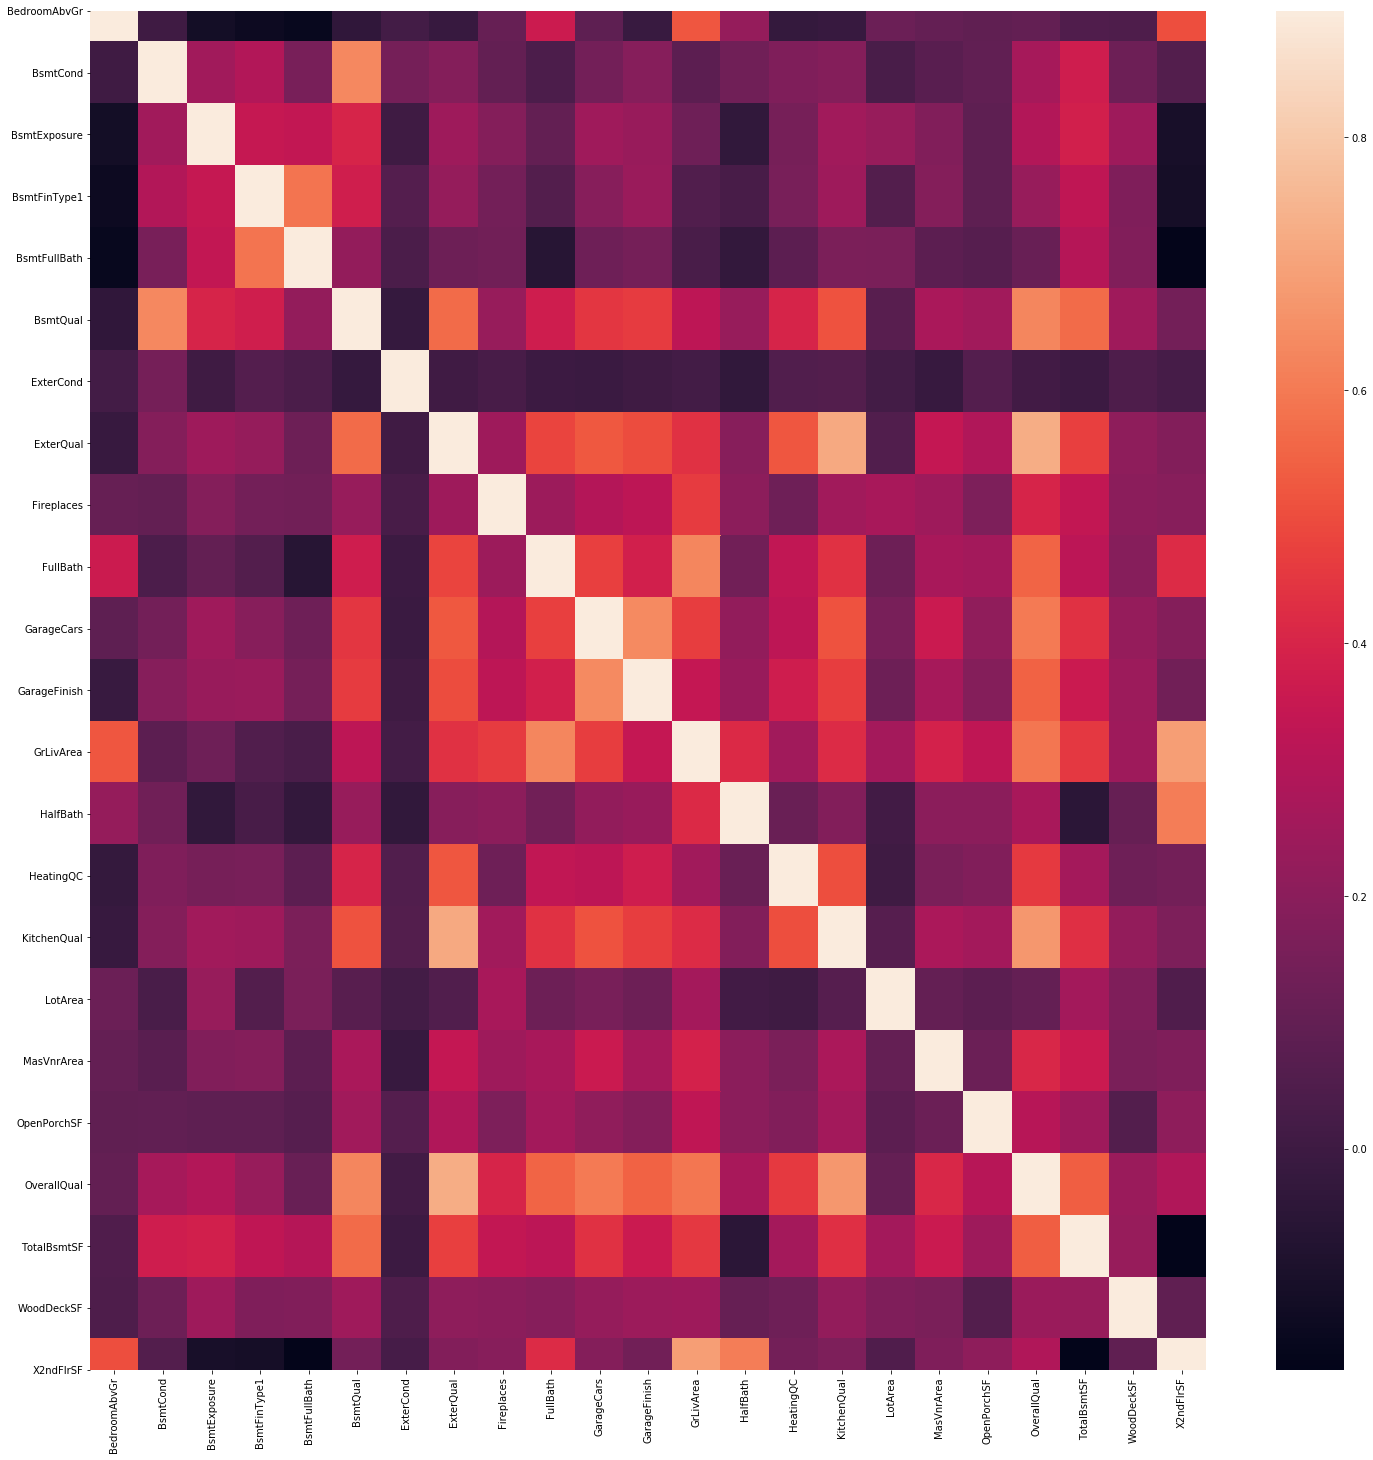

In [98]:
#Correlation matrix with new encoded variables
corr_matrix = result.corr()
f, ax1 = plt.subplots(figsize=(25,25)) #Crea il sistema di riferimento
ax1=sns.heatmap(corr_matrix,vmax = 0.9); #Con Seaborn fai una heatmap che ha val. max. 0.9

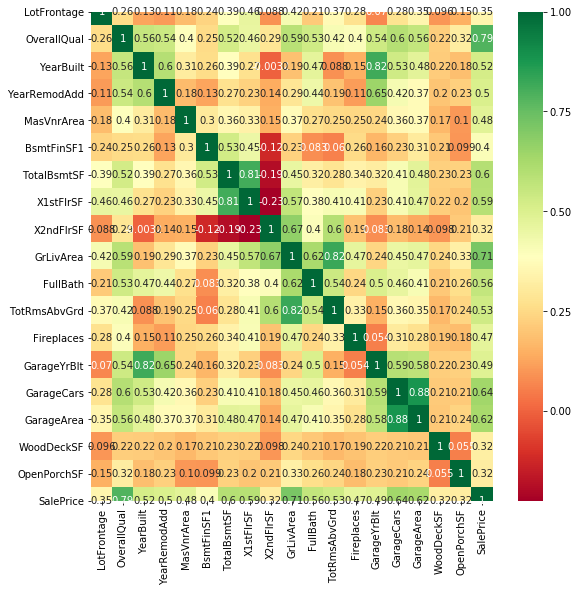

In [99]:
corrmat = data_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.3]
plt.figure(figsize=(9,9))
g = sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [100]:
pd.set_option('display.max_columns', 70)

In [102]:
#Near 0 variance
del result['ExterCond']

KeyError: 'ExterCond'

In [103]:
del result['BsmtCond'] #Near 0 variance

# Outliers

In [105]:
#Here we extract the numerical variables, this will come in handy later on
n_features = result.select_dtypes(exclude = ["object"]).columns

In [106]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

result = mod_outlier(result)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


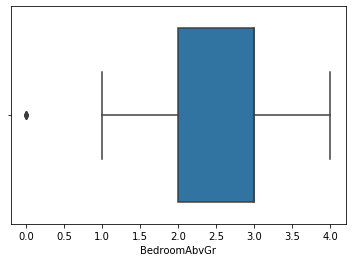

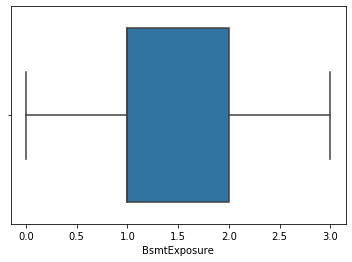

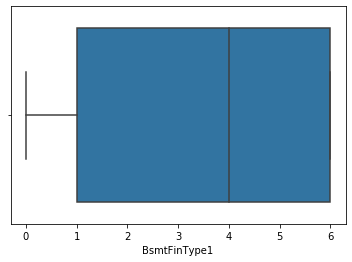

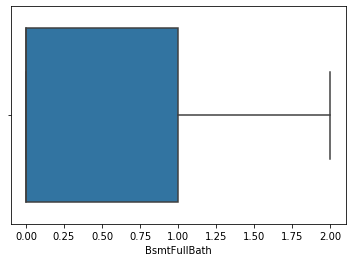

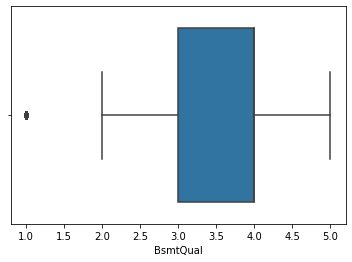

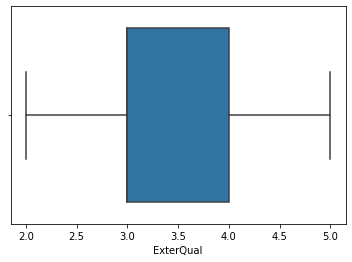

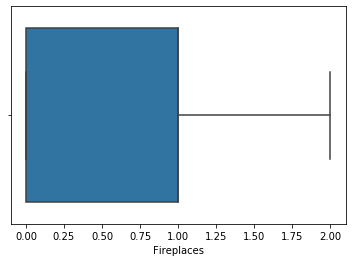

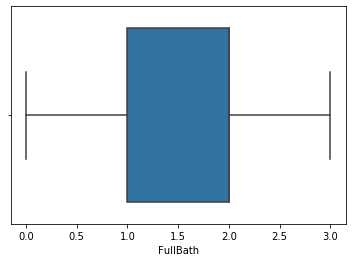

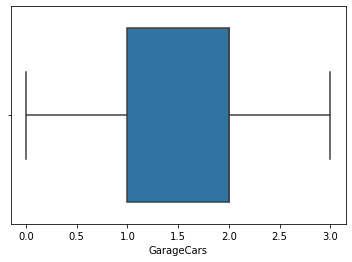

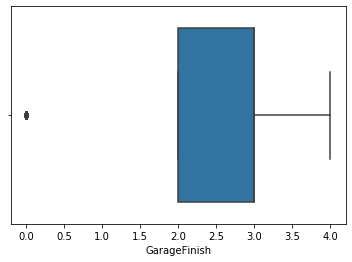

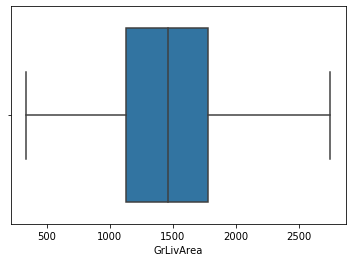

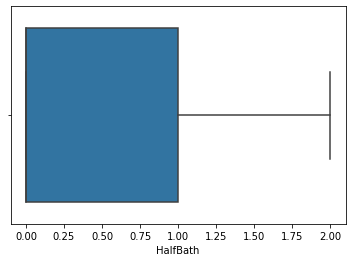

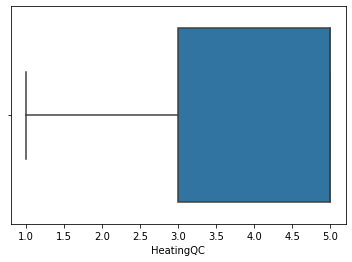

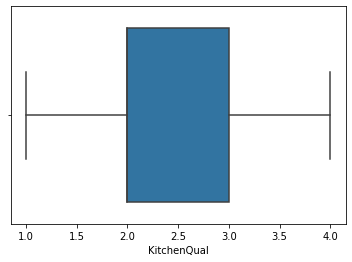

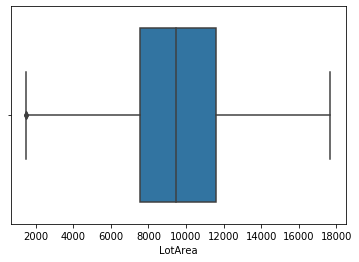

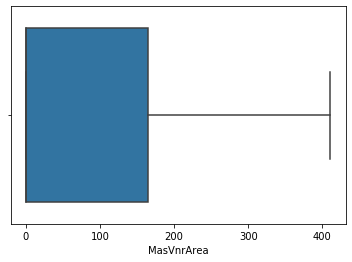

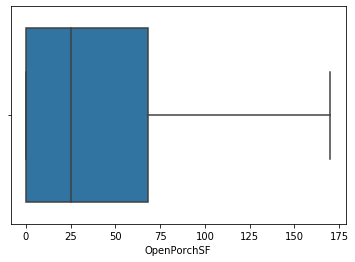

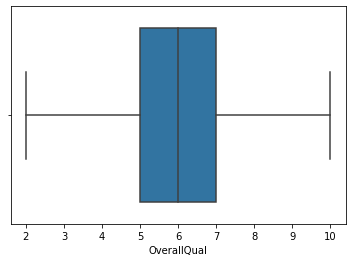

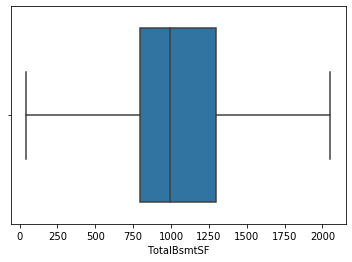

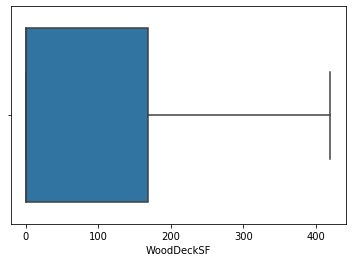

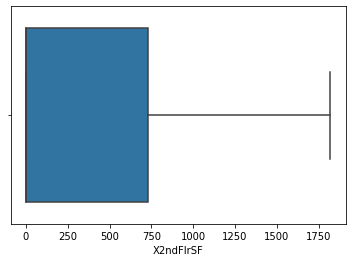

In [107]:
for i in result[n_features]:
    sns.boxplot(x=result[i])
    plt.show()

In [108]:
result

,BedroomAbvGr,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtQual,ExterQual,Fireplaces,FullBath,GarageCars,GarageFinish,GarageType,GrLivArea,HalfBath,Heating,HeatingQC,KitchenQual,LotArea,LotConfig,LotShape,MSZoning,MasVnrArea,MasVnrType,Neighborhood,OpenPorchSF,OverallQual,PavedDrive,TotalBsmtSF,WoodDeckSF,X2ndFlrSF
0,3,1,6,1,3,3,0,3,1,2,Attchd,2008,0,GasA,5,4,7800,Inside,Reg,RL,0.000,None,Edwards,0,5,Y,896,103,896
1,3,1,3,1,3,3,2,1,2,2,Attchd,1264,0,GasA,3,2,9300,Inside,Reg,RL,324.000,BrkFace,NAmes,0,5,Y,1268,0,0
2,3,1,6,1,4,4,1,2,3,3,Attchd,1629,0,GasA,5,3,10655,Inside,IR1,RL,296.000,BrkFace,NridgHt,0,8,Y,2052,0,0
3,2,1,2,0,3,3,0,1,1,2,Detchd,616,0,GasA,4,2,6000,Inside,Reg,RM,0.000,None,BrkSide,0,5,Y,616,0,0
4,3,3,1,0,5,4,1,2,3,3,Attchd,1717,0,GasA,5,3,11146,Inside,IR1,RL,250.000,Stone,NridgHt,39,8,Y,1709,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,0,0,0,1,3,0,2,2,2,Detchd,1040,0,GasA,4,2,8544,Inside,Reg,RL,0.000,None,NAmes,0,3,Y,42,0,0
1456,2,1,6,0,4,4,0,2,2,3,BuiltIn,1626,0,GasA,5,3,2268,Inside,Reg,RL,106.000,Stone,NridgHt,27,7,Y,764,0,862
1457,2,3,6,1,4,3,0,2,2,4,Basment,1072,0,GasA,4,2,3675,Inside,Reg,RM,82.000,BrkFace,Edwards,44,6,Y,547,0,0
1458,2,3,6,1,4,4,1,2,2,4,Attchd,1987,0,GasA,5,3,14303,Corner,IR1,RL,410.625,BrkFace,NoRidge,36,8,Y,1986,262,0


In [109]:
#Here we split train and test back and we attach "SalePrice" to the train
data_train_new, data_test_new = result[:1100], result[1101:]
data_train_new['SalePrice'] = y

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
data_train_new

,BedroomAbvGr,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtQual,ExterQual,Fireplaces,FullBath,GarageCars,GarageFinish,GarageType,GrLivArea,HalfBath,Heating,HeatingQC,KitchenQual,LotArea,LotConfig,LotShape,MSZoning,MasVnrArea,MasVnrType,Neighborhood,OpenPorchSF,OverallQual,PavedDrive,TotalBsmtSF,WoodDeckSF,X2ndFlrSF,SalePrice
0,3,1,6,1,3,3,0,3,1,2,Attchd,2008,0,GasA,5,4,7800,Inside,Reg,RL,0.0,None,Edwards,0,5,Y,896,103,896,225000
1,3,1,3,1,3,3,2,1,2,2,Attchd,1264,0,GasA,3,2,9300,Inside,Reg,RL,324.0,BrkFace,NAmes,0,5,Y,1268,0,0,167500
2,3,1,6,1,4,4,1,2,3,3,Attchd,1629,0,GasA,5,3,10655,Inside,IR1,RL,296.0,BrkFace,NridgHt,0,8,Y,2052,0,0,284000
3,2,1,2,0,3,3,0,1,1,2,Detchd,616,0,GasA,4,2,6000,Inside,Reg,RM,0.0,None,BrkSide,0,5,Y,616,0,0,89000
4,3,3,1,0,5,4,1,2,3,3,Attchd,1717,0,GasA,5,3,11146,Inside,IR1,RL,250.0,Stone,NridgHt,39,8,Y,1709,169,0,255500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3,1,6,0,4,3,0,1,1,4,Attchd,1392,1,GasA,5,2,10900,FR2,IR1,RL,153.0,BrkFace,CollgCr,36,6,Y,689,0,703,161750
1096,3,1,1,0,3,3,0,2,1,2,Detchd,1302,1,GasA,3,2,1680,Inside,Reg,RM,142.0,BrkFace,BrDale,0,5,Y,630,0,672,112000
1097,3,1,1,0,4,4,0,2,2,3,Attchd,1479,0,GasA,5,3,9382,CulDSac,IR1,RL,125.0,BrkFace,CollgCr,25,7,Y,1468,120,0,191000
1098,3,1,1,0,3,3,1,1,1,2,Detchd,1375,1,GasA,3,3,9000,Inside,Reg,RM,0.0,None,IDOTRR,162,6,P,780,0,595,141000


In [111]:
data_test_new

,BedroomAbvGr,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtQual,ExterQual,Fireplaces,FullBath,GarageCars,GarageFinish,GarageType,GrLivArea,HalfBath,Heating,HeatingQC,KitchenQual,LotArea,LotConfig,LotShape,MSZoning,MasVnrArea,MasVnrType,Neighborhood,OpenPorchSF,OverallQual,PavedDrive,TotalBsmtSF,WoodDeckSF,X2ndFlrSF
1101,3,3,6,1,5,5,1,2,3,4,BuiltIn,2332,1,GasA,5,4,12474,Inside,Reg,RL,272.000,Stone,NridgHt,134,10,Y,1682,196,590
1102,1,3,6,1,4,3,0,1,1,2,Attchd,630,0,GasA,3,3,1526,Inside,Reg,RM,0.000,None,MeadowV,0,4,Y,630,0,0
1103,3,1,5,1,3,3,0,1,2,2,Detchd,981,1,GasA,3,2,10530,Corner,IR1,RL,0.000,None,NAmes,170,6,Y,981,0,0
1104,2,1,1,0,4,4,0,2,2,3,Detchd,1223,1,GasA,5,3,2544,Inside,Reg,FV,0.000,None,Somerst,166,7,Y,600,0,623
1105,3,1,6,1,4,3,0,2,2,3,Attchd,1294,0,GasA,4,3,7153,Inside,Reg,RL,88.000,BrkFace,SawyerW,51,6,Y,1278,112,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,0,0,0,1,3,0,2,2,2,Detchd,1040,0,GasA,4,2,8544,Inside,Reg,RL,0.000,None,NAmes,0,3,Y,42,0,0
1456,2,1,6,0,4,4,0,2,2,3,BuiltIn,1626,0,GasA,5,3,2268,Inside,Reg,RL,106.000,Stone,NridgHt,27,7,Y,764,0,862
1457,2,3,6,1,4,3,0,2,2,4,Basment,1072,0,GasA,4,2,3675,Inside,Reg,RM,82.000,BrkFace,Edwards,44,6,Y,547,0,0
1458,2,3,6,1,4,4,1,2,2,4,Attchd,1987,0,GasA,5,3,14303,Corner,IR1,RL,410.625,BrkFace,NoRidge,36,8,Y,1986,262,0


# Create Dummy Variables

In [112]:
data_train_dummies = pd.get_dummies(data_train_new)
data_train_dummies

,BedroomAbvGr,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtQual,ExterQual,Fireplaces,FullBath,GarageCars,GarageFinish,GrLivArea,HalfBath,HeatingQC,KitchenQual,LotArea,MasVnrArea,OpenPorchSF,OverallQual,TotalBsmtSF,WoodDeckSF,X2ndFlrSF,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,LotConfig_Corner,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,3,1,6,1,3,3,0,3,1,2,2008,0,5,4,7800,0.0,0,5,896,103,896,225000,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3,1,3,1,3,3,2,1,2,2,1264,0,3,2,9300,324.0,0,5,1268,0,0,167500,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,1,6,1,4,4,1,2,3,3,1629,0,5,3,10655,296.0,0,8,2052,0,0,284000,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2,1,2,0,3,3,0,1,1,2,616,0,4,2,6000,0.0,0,5,616,0,0,89000,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,3,1,0,5,4,1,2,3,3,1717,0,5,3,11146,250.0,39,8,1709,169,0,255500,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3,1,6,0,4,3,0,1,1,4,1392,1,5,2,10900,153.0,36,6,689,0,703,161750,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1096,3,1,1,0,3,3,0,2,1,2,1302,1,3,2,1680,142.0,0,5,630,0,672,112000,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1097,3,1,1,0,4,4,0,2,2,3,1479,0,5,3,9382,125.0,25,7,1468,120,0,191000,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1098,3,1,1,0,3,3,1,1,1,2,1375,1,3,3,9000,0.0,162,6,780,0,595,141000,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Model

## K-Fold Cross Validation

In [118]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [119]:
X = data_train_dummies[data_train_dummies.columns.difference(['SalePrice'])]

In [120]:
Y = data_train_dummies['SalePrice']

In [121]:
X

,BedroomAbvGr,BsmtExposure,BsmtFinType1,BsmtFullBath,BsmtQual,ExterQual,Fireplaces,FullBath,GarageCars,GarageFinish,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GrLivArea,HalfBath,HeatingQC,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual,LotArea,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OpenPorchSF,OverallQual,PavedDrive_N,PavedDrive_P,PavedDrive_Y,TotalBsmtSF,WoodDeckSF,X2ndFlrSF
0,3,1,6,1,3,3,0,3,1,2,0,1,0,0,0,0,0,2008,0,5,1,0,0,0,0,4,7800,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,896,103,896
1,3,1,3,1,3,3,2,1,2,2,0,1,0,0,0,0,0,1264,0,3,1,0,0,0,0,2,9300,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,1268,0,0
2,3,1,6,1,4,4,1,2,3,3,0,1,0,0,0,0,0,1629,0,5,1,0,0,0,0,3,10655,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8,0,0,1,2052,0,0
3,2,1,2,0,3,3,0,1,1,2,0,0,0,0,0,1,0,616,0,4,1,0,0,0,0,2,6000,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,616,0,0
4,3,3,1,0,5,4,1,2,3,3,0,1,0,0,0,0,0,1717,0,5,1,0,0,0,0,3,11146,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,39,8,0,0,1,1709,169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3,1,6,0,4,3,0,1,1,4,0,1,0,0,0,0,0,1392,1,5,1,0,0,0,0,2,10900,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,6,0,0,1,689,0,703
1096,3,1,1,0,3,3,0,2,1,2,0,0,0,0,0,1,0,1302,1,3,1,0,0,0,0,2,1680,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,630,0,672
1097,3,1,1,0,4,4,0,2,2,3,0,1,0,0,0,0,0,1479,0,5,1,0,0,0,0,3,9382,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,7,0,0,1,1468,120,0
1098,3,1,1,0,3,3,1,1,1,2,0,0,0,0,0,1,0,1375,1,3,1,0,0,0,0,3,9000,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,6,0,1,0,780,0,595


In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 40)

## Linear Regression

In [123]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
print(lr.intercept_)

-119704.06697330033


In [125]:
print(lr.coef_)

[-3.72317446e+03  4.35148342e+03  1.64616972e+03  3.15067359e+03
  5.25416156e+02  5.36228674e+03  7.01429806e+03  1.11699386e+04
  1.12666176e+04  5.32975540e+03 -4.93390543e+04  1.83917841e+03
 -8.55122421e+02  7.48176367e+03  6.39613484e+03  4.35174854e+03
  3.01253512e+04  1.71332162e+01  2.93230137e+03  2.43966410e+03
 -8.22537223e+01  1.13104030e+04 -9.75477776e+02 -3.86393312e+04
  2.83866597e+04  9.46857301e+03  2.80103726e+00 -1.20991365e+03
  1.12256179e+04 -9.47087626e+03 -2.21702182e+03  1.67219383e+03
  6.89716209e+03  2.21097006e+03 -1.68511942e+04  7.74306200e+03
 -2.30014052e+04  1.35881637e+04  5.77045677e+03  4.21413804e+03
 -5.71353294e+02  1.66266179e+01 -8.83985114e+03 -2.62583891e+03
  5.58778437e+03  5.87790568e+03  8.08993903e+02 -1.08815192e+04
  3.85318383e+02  6.33413346e+03 -1.14951302e+04 -8.84736379e+03
  9.45237373e+03 -1.37968961e+04 -1.92510410e+04 -2.76093731e+03
 -1.12360897e+04 -1.11741326e+04 -3.92246983e+03 -4.96515548e+03
 -1.32530857e+04  7.06143

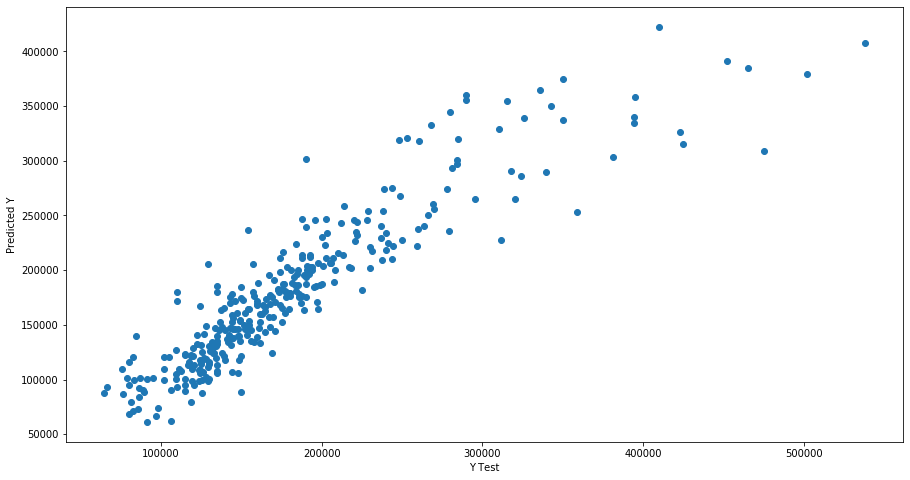

In [126]:
predicted = lr.predict(X_test)
plt.figure(figsize=(15,8))
plt.scatter(Y_test,predicted)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [58]:
score = rmsle_cv(lr)
print("\nLinear Regression score: {:.4f}\n".format(score.mean()))


Linear Regression score: 33555.6581



In [127]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predicted))
print('MSE:', metrics.mean_squared_error(Y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predicted)))

MAE: 21399.14465972193
MSE: 971604193.9251336
RMSE: 31170.566147010126


## Lasso

In [60]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [61]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 33556.6066 (1572.0290)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80571594608.63568, tolerance: 525412259.42579955
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199113190294.61902, tolerance: 572315100.7738687
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96970008516.24359, tolerance: 561006490.5662863
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

In [ ]:
##lasso = linear_model.Lasso()
### y_pred = cross_val_predict(lasso, X, y, cv=5)

## G Boosting

In [131]:
GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
#RMSE estimated through the partition of the train set
GBoost.fit(X_train, Y_train)
rmse = math.sqrt(mean_squared_error(Y_test, GBoost.predict(X_test)))
print("RMSE: %.4f" % rmse)

RMSE: 26670.4357


In [132]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 28340.1644 (3364.3058)



# Random Forest

In [133]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X,Y)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [134]:
# Score model
score = rmsle_cv(regressor)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Random Forest score: 29846.4577 (3110.6900)

